<a href="https://colab.research.google.com/github/manasakoduri/Evaluation/blob/main/ManasaK_Evaluation_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df=pd.read_csv("/content/drive/MyDrive/Survey - Sheet1.csv")
print(df)

        Training area                  Project Team  # of members Interested
0                 IBM          Clould Strategy Team                       41
1                 IBM                       AI Team                       29
2                 IBM         Image processing team                       12
3                 SAP                      ERP Team                       16
4                 SAP  Supply Chain Management Team                       32
5                 AWS           Cloud Strategy Team                       22
6                 AWS     Cloud Implementation Team                       45
7                 AWS                      ERP Team                       34
8                 IoT           Cloud security Team                       24
9                 IoT                      ERP Team                       31
10           Security           Cloud security Team                        8
11           Security           Cloud Strategy Team                       27

In [9]:
df.index = df['Training area']

df = df.sort_values(by='# of members Interested',ascending=False)

In [16]:
df["cumulativePercentage"] = df["# of members Interested"].cumsum()/df["# of members Interested"].sum()*100

df["cumulativePercentage"] = df["cumulativePercentage"].apply(lambda x: round(x,2))
print (df)

                       Training area                  Project Team  \
Training area                                                        
AWS                              AWS     Cloud Implementation Team   
quantum computing  quantum computing           Cloud security Team   
IBM                              IBM          Clould Strategy Team   
Scrum                          Scrum                      ERP Team   
AWS                              AWS                      ERP Team   
SAP                              SAP  Supply Chain Management Team   
IoT                              IoT                      ERP Team   
SDN                              SDN     Cloud Implementation Team   
IBM                              IBM                       AI Team   
Scrum                          Scrum  Supply Chain Management Team   
Security                    Security           Cloud Strategy Team   
IoT                              IoT           Cloud security Team   
Cryptography        

In [17]:
pd.crosstab(df['Training area'],df['cumulativePercentage'],normalize='index')

cumulativePercentage,7.88,15.24,22.42,28.37,34.33,39.93,45.36,50.61,55.69,60.77,...,77.76,81.61,84.94,87.92,90.72,92.82,94.92,96.85,98.60,100.00
Training area,,,,,,,,,,,,,,,,,,,,,
AWS,0.333333,0.0,0.000000,0.00,0.333333,0.0,0.0,0.000000,0.000000,0.00,...,0.000000,0.333333,0.0,0.0,0.0,0.000000,0.000000,0.00,0.00,0.0
Cryptography,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.00,...,0.000000,0.000000,0.0,0.5,0.0,0.000000,0.000000,0.00,0.00,0.0
IBM,0.000000,0.0,0.333333,0.00,0.000000,0.0,0.0,0.000000,0.333333,0.00,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.333333,0.00,0.00,0.0
IoT,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.5,0.000000,0.000000,0.00,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.00,0.0
SAP,0.000000,0.0,0.000000,0.00,0.000000,0.5,0.0,0.000000,0.000000,0.00,...,0.000000,0.000000,0.0,0.0,0.5,0.000000,0.000000,0.00,0.00,0.0
SDN,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.0,0.333333,0.000000,0.00,...,0.333333,0.000000,0.0,0.0,0.0,0.333333,0.000000,0.00,0.00,0.0
Scrum,0.000000,0.0,0.000000,0.25,0.000000,0.0,0.0,0.000000,0.000000,0.25,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.25,0.25,0.0
Security,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.00,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00,0.00,0.5
quantum computing,0.000000,0.5,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.00,...,0.000000,0.000000,0.5,0.0,0.0,0.000000,0.000000,0.00,0.00,0.0


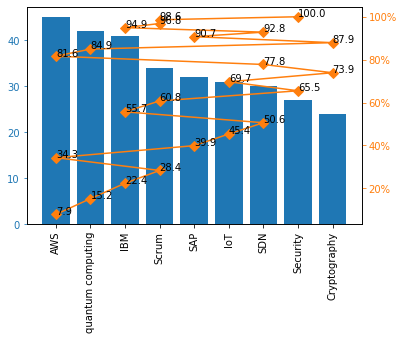

In [15]:
fig, ax = plt.subplots()
ax.bar(df.index, df["# of members Interested"], color = "C0")

ax.set_xticklabels(df['Training area'], rotation = 90)

ax2 = ax.twinx()

ax2.plot(df.index, df["cumulativePercentage"], color = "C1", marker = "D", ms = 7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors = "C0")
ax2.tick_params(axis="y", colors = "C1")

for index, v in df.iterrows() :
        label = round(v['cumulativePercentage'], 1)
        plt.annotate(label, xy= (v['Training area'], v['cumulativePercentage']))

plt.show()